# Training a Multilayer Neural Network for Image Classification

First, let's import the necessary packages

In [ ]:
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Fashion MNIST is a collection of 70,000 grayscale images of 28x28 pixels (each with intensity in the range 0-255), each with 10 classes. The images represent fashion items. Keras provides a utility function to preload this data set directly, with the data set already broken into train and test sets

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Let's look at the shape and data of the training set

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

Instead of eventually doing cross validation on the training set, let's further break the training set into a training set and a validation set, as this is more reliable, if we have the data to do it. Let's also scale the intensities of each pixel to be in the range 0-1.


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's look at the first image in the training set:

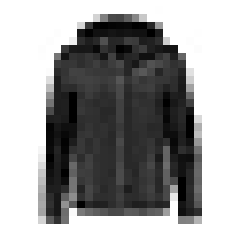

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are numbers that correspond to the class names

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

Let's look at the sizes for our train, validation and test sets:

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

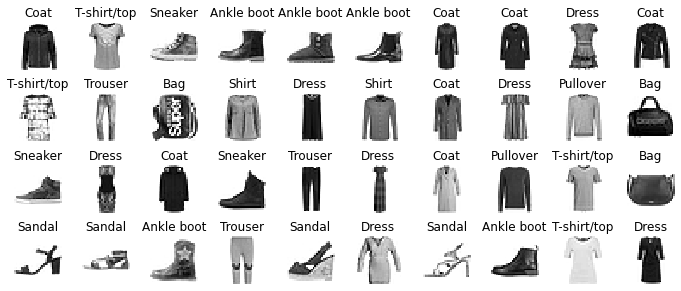

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a neural network with two hidden layers. Let's setup our random seeds for reproducibility

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Let's use the simplest sequential model. 
* We build our input layer that flattens the images into a 1D array.
* Next we add a dense hidden layer with 300 neurons; it manages its own weight matrix and bias terms, and uses the ReLU activation function.
* Then we add a second hidden layer with 100 neurons and the ReLU activation function.
* Finally, we add the output layer with 10 neurons (for the 10 output classes). Since we must choose one of those 10 classes, we use the softmax activation function, rather than the sigmoid activation function. Softmax can handle the multinomial classification problem. 




In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

You can look at textual and visual summaries of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


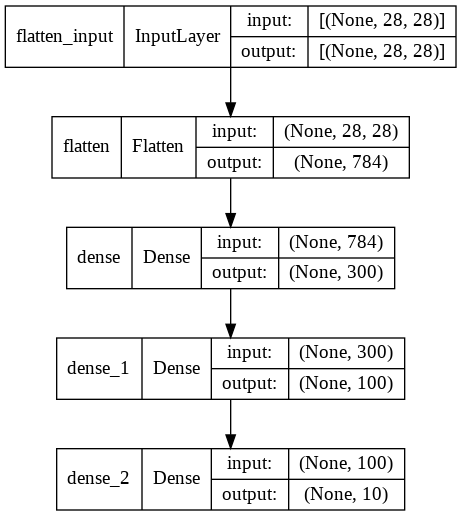

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png",show_shapes=True)

You can access the model's layers and individual layers as below. 

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

You can also seen the parameters for a particular layer

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

After a model is created, you must call its compile() method to specify the loss function and optimizer to use. You can also optionally specify extra metrics to compute during training and evaluation.
*  We use "sparse_categorical_crossentropy" because we have sparse labels (for each instance, there is just a target class index from 0-9). If we were doing binary classification, then we would use the sigmoid activation function (instead of softmax), and we would use "binary_crossentropy"
* We will train the model using simple stochastic gradient descent  with a learning rate of 0.01 and momentum of 0. There are multiple parameters you can specify here.
* Since this is a classifier, it's useful to measure the accuracy during training and evaluation

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.0),
              metrics=["accuracy"])

To train the model, we simply call the fit function. 
* We specify the epochs, and we provide our validation set. Since we have this validation set, we will not use cross validation. The training reports a training and validation loss and accuracy.
* Note that the fit() method uses a batch size of 32 as default if you do not explicitly specify that. This means that 32 sampled instances are used per epoch, and not the full training set. It has been shown that using the full training set can lead to models that generalize poorly. But you can certainly try batch sizes greater than 32, ideally in powers of 2.

In [ ]:
history = model.fit(X_train, y_train, epochs=30,batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4391 - accuracy: 0.8457 - val_loss: 0.5333 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4123 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3939 - accuracy: 0.8616 - val_loss: 0.3741 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3751 - accuracy: 0.8678 - val_loss: 0.3706 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3630 - accuracy: 0.8715 - val_loss: 0.3621 - val_accuracy:

The fit() method returns a history object that contains the training parameters, list of epochs, it went rhough, and a dictionary containing the loss and extra metrics measured at the end of each epoch. 

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

You can use this data to plot the bias-variance curve. You can see that we have still not overfit the model, so we could probably keep training for more epochs.
The validation set loss plot serves as our Test data line in the graph in the Performance Evaluation lecture, while the training set loss plot serves as the CV line in our graph in lecture

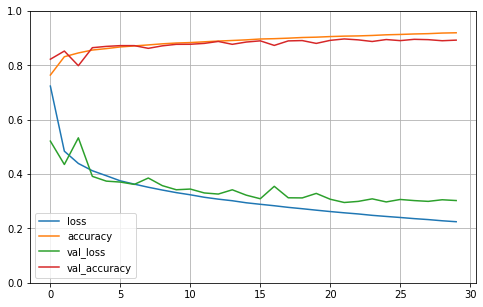

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

If you are not satisfied with your model perfomance,
* first tune the hyperparameters, starting with the learning rate, and then other hyper parameters
* if that does not help, then tune the model parameters such as the number of layers, number of neurons per layer, and the types of activation functions for each hidden layer
* You can also try tuning the batch size hyperparameter

Once you are satisfied with the model's performance, evaluate it on the test set to estimate the generalization error using the evaluate() method

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8820


[0.3366333842277527, 0.8820000290870667]

Next, use the predict() method to make predictions. Since we don't have new instances, let's just use the first 3 instances of the test set.

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As you can see above, for each instance the model estimates one probability per class from class 0 to class 9. 

So the first image is class 9 (ankle boot) with 96% probability and class 7 (sneaker) with 3% probability. 

If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the predict() method instead

In [ ]:
y_pred = model.predict(X_new)
y_pred

array([[3.3825725e-06, 3.8628073e-07, 6.5566543e-05, 8.5288029e-06,
        3.7595310e-06, 9.8043215e-03, 5.3227218e-06, 2.7664397e-02,
        7.0207252e-04, 9.6174222e-01],
       [1.1373470e-05, 2.5406893e-08, 9.8671442e-01, 1.2798997e-08,
        1.3037741e-02, 8.0460361e-12, 2.3646333e-04, 6.6118773e-12,
        6.9020789e-09, 1.6687093e-11],
       [2.0375987e-06, 9.9999738e-01, 1.6198896e-08, 3.1685352e-07,
        1.6866635e-07, 7.0741102e-14, 4.5530466e-10, 2.0313344e-13,
        8.6761851e-09, 1.2582525e-12]], dtype=float32)

In [ ]:
pred = np.argmax(y_pred,axis=1)
np.array(class_names)[pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Here the classifier classified all three images correctly.

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

And we can see the actual images too

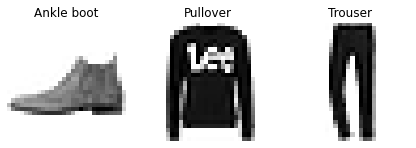

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

So hopefully this gives you an idea of how to set up a multilayer neural network using tensor flow and keras